## Part 1 - Exploratory Data Analysis

<p>The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
</p>

<p>
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.
</p>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import datetime as dt

/Users/collinlyou/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<span class="badge badge-pill badge-default">logins.json</span>
<div class="alert alert-success" role="alert">
  <b>Time Series Analysis of Logins</b> 
  <p>A few interesting things to note:</p>
  <li>The largest number of logins occurs on the weekend (Friday - Sunday), with the Saturday having the most number of logins
  <li>Users log in at around lunch time (11:00 - 12:00) and in the late evening/early morning (20:00 - 04:00)
</div>

In [2]:
# Logins 
df = pd.read_json('logins.json')
df2 = df.copy(deep=False)
print(df.head(5))
print(df.tail(5))

           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21
               login_time
93137 1970-04-13 18:50:19
93138 1970-04-13 18:43:56
93139 1970-04-13 18:54:02
93140 1970-04-13 18:57:38
93141 1970-04-13 18:54:23


In [3]:
df.login_time = pd.DatetimeIndex(df['login_time'])
df.login_time.dtype

dtype('<M8[ns]')

In [4]:
# Name the column and set the timestamp to the index
df2.columns = ['time']
df2.set_index('time', inplace=True)

# Each timestamp is counted with 1 
df2['count'] = 1

In [5]:
# Aggregate in 15 minute intervals 
df2 = df2.resample('15T').sum()
df2.head(10)

,count
time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0
1970-01-01 21:15:00,4.0
1970-01-01 21:30:00,NaN
1970-01-01 21:45:00,4.0
1970-01-01 22:00:00,9.0


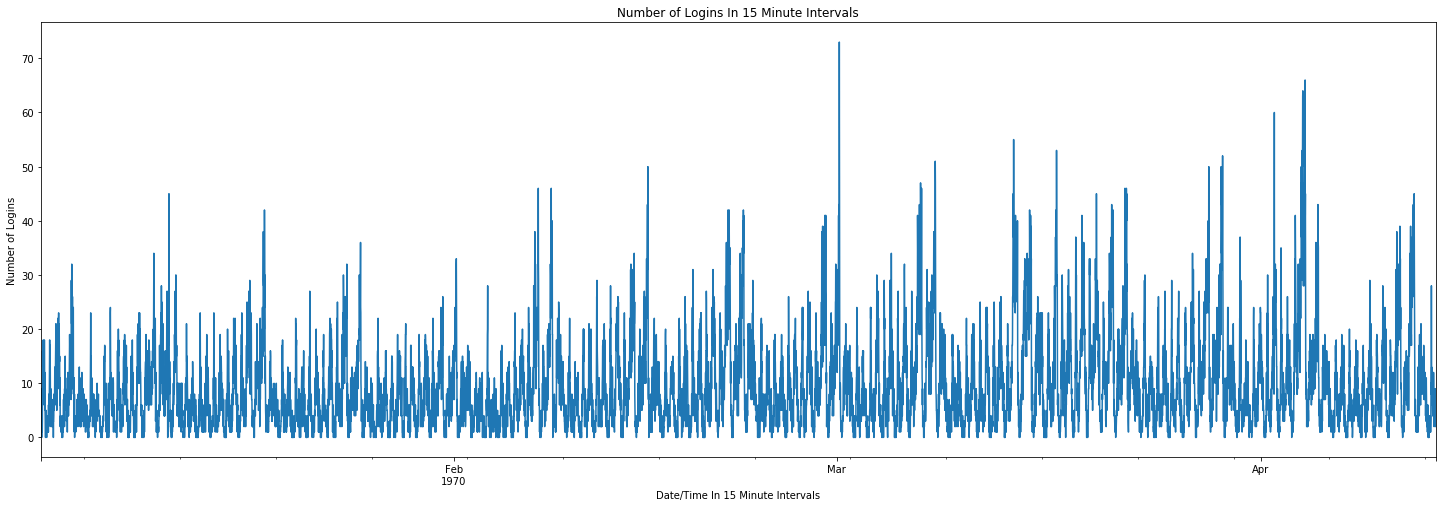

In [6]:
ts = df.groupby(pd.Grouper(key='login_time', freq='15T'))['login_time'].count()

plt.figure(figsize=(25,8))
ts.plot()
plt.title('Number of Logins In 15 Minute Intervals')
plt.xlabel('Date/Time In 15 Minute Intervals')
plt.ylabel('Number of Logins')
plt.show()

### Total Logins by Day of Week

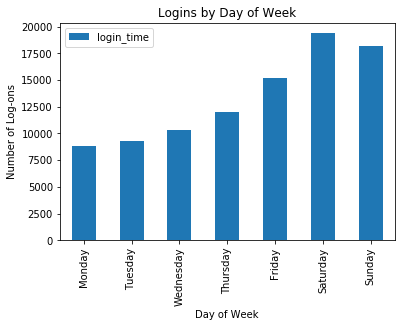

In [7]:
dates1 = pd.to_datetime(df.login_time, format='%Y-%m-%d')
days = dates1.dt.weekday_name

# Create a mapping key to sort days from Monday to Sunday 
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(weekdays)}
key = days.map(mapping)

# Create dataframe of day names
days_df = dates1.iloc[key.argsort()].dt.weekday_name.to_frame()

# Plot the data 
days_df.login_time.value_counts().reindex(weekdays, fill_value=0).plot(kind='bar')
plt.title('Logins by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Log-ons')
plt.legend(loc='upper left')
plt.show()

### Total Logins by Hour of the Day

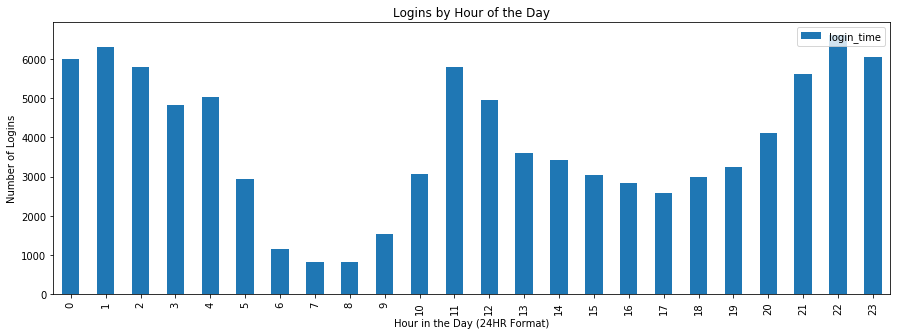

In [8]:
# Create a mapping key to sort hours of the day 
hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
mapping = {hour: i for i, hour in enumerate(hours)}
key = days.map(mapping)


hour = dates1.dt.hour
hour_df = hour.to_frame()
plt.figure(figsize=(15,5))
hour_df.login_time.value_counts().reindex(hours, fill_value=0).plot(kind='bar')
plt.title('Logins by Hour of the Day')
plt.xlabel('Hour in the Day (24HR Format)')
plt.ylabel('Number of Logins')
plt.legend(loc='upper right')
plt.show()

### Week to Week Logins

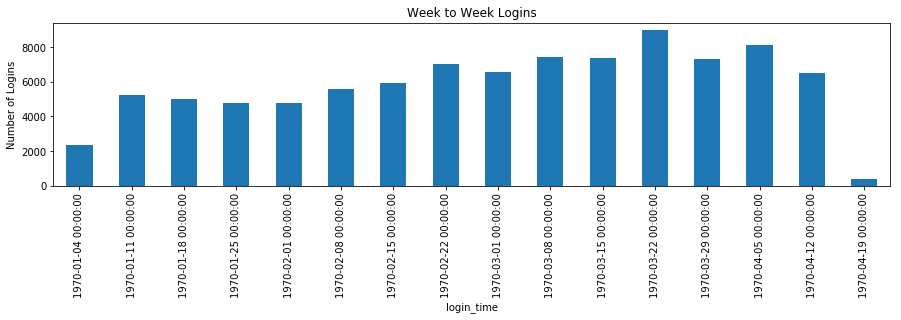

In [9]:
dfW = ts.resample('W').sum()
plt.figure(figsize=(15,3))
plt.title('Week to Week Logins')
plt.xlabel('Week')
plt.ylabel('Number of Logins')
plt.legend(loc='upper right')
dfW.plot.bar()
plt.show()

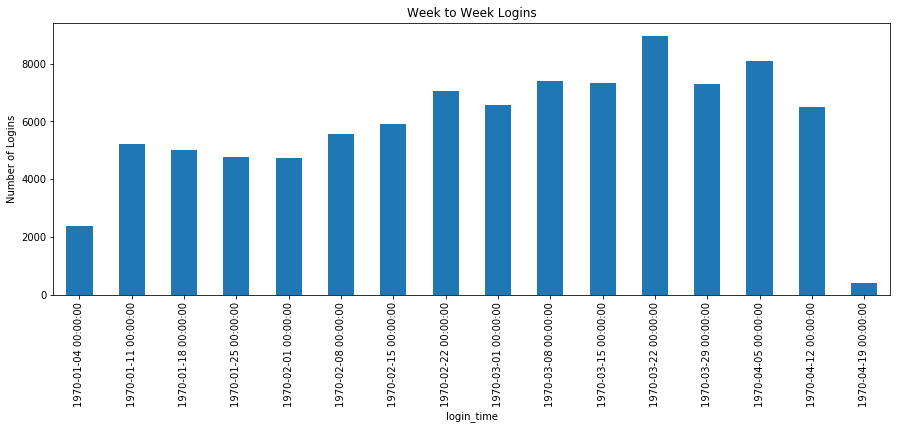

In [10]:
dfH = ts.resample('H').sum()
plt.figure(figsize=(15,5))
plt.title('Week to Week Logins')
plt.xlabel('Week')
plt.ylabel('Number of Logins')
plt.legend(loc='upper right')
dfW.plot.bar()
plt.show()

In [11]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [12]:
df['year'] = df['login_time'].dt.year
df['month'] = df['login_time'].dt.month
df['day'] = df['login_time'].dt.day
df['dayofweek'] = df['login_time'].dt.dayofweek
df['hour'] = df['login_time'].dt.hour
df['count'] = 1

df.head()

,login_time,year,month,day,dayofweek,hour,count
0,1970-01-01 20:13:18,1970,1,1,3,20,1
1,1970-01-01 20:16:10,1970,1,1,3,20,1
2,1970-01-01 20:16:37,1970,1,1,3,20,1
3,1970-01-01 20:16:36,1970,1,1,3,20,1
4,1970-01-01 20:26:21,1970,1,1,3,20,1


In [13]:
logpiv = df.groupby(['dayofweek', 'hour']).size().unstack(fill_value=0) #Pivot Table
logpiv.T

dayofweek,0,1,2,3,4,5,6
hour,,,,,,,
0,531,607,687,816,975,1254,1123
1,414,566,686,777,957,1562,1355
2,312,394,482,625,771,1608,1608
3,236,198,299,375,502,1574,1647
4,206,149,245,255,353,1719,2107
5,121,113,135,136,245,1093,1102
6,66,46,48,67,121,408,382
7,111,64,84,81,105,178,192
8,147,88,99,95,109,127,153


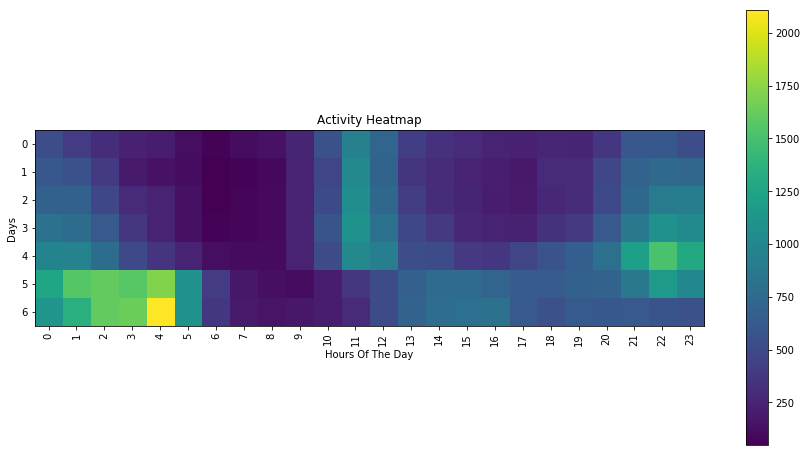

In [14]:
fig, ax = plt.subplots()
im = ax.imshow(logpiv)
fig.colorbar(im, ax=ax)
fig.set_size_inches(15, 8)


ax.set_xticks(range(len(logpiv.columns)))
ax.set_yticks(range(len(logpiv.index)))
ax.set_xticklabels(logpiv.columns, rotation=90)
ax.set_yticklabels(logpiv.index)
ax.set_title("Activity Heatmap")
ax.set_xlabel("Hours Of The Day")
ax.set_ylabel("Days")

plt.show()

<span class="badge badge-pill badge-default">logins.json</span>
<div class="alert alert-success" role="alert">
  <b>Time Series Analysis of Logins</b> 
  <p>A few interesting things to note:</p>
  <li>The largest number of logins occurs on the weekend (Friday - Sunday), with the Saturday having the most number of logins
  <li>Users log in at around lunch time (11:00 - 12:00) and in the late evening/early morning (20:00 - 04:00)
<p></p>
<p></p>
<b>Data Quality</b> 
<li>Aggregating at the 15 min level creates some Nan values that correspond to zero activity. At broader timescales this isn't an issue.
<p></p>
<p></p>
<b>Findings:</b> 
<li>The 15 minute timescale shows two patterns. The first is an overall positive drift in the counts and the second is a wavelike fluctuation within a specific timeframe. Further analysis at a broader level will separate these effects.
<li>At the week level, one sees that counts are increasing overall suggesting that the business is acquiring more customers since inception.
<li>At the hour level, one sees the times of the greatest and least activity: The least activity occurs in the period between 6AM and 10AM while the most activity occurs in the period between 11AM and 1PM and the period between 8P and 4A.
<li>At the day of the week level, one sees that the lowest activity occurs on Monday and rises through the week with the peak activity on Saturday followed by a slight dip on Sunday.
<li><u>The Heatmap</u>: Combining the hour and the day level, one sees that peak activity occurs on the weekend nights between 9P and 4A
<p></p>
</div>



## Part 2 - Experiment and Metrics Design

<p>The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
</p>

<ol>
<li>What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
<li>Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: a. how you will implement the experiment b. what statistical test(s) you will conduct to verify the significance of the observation c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
<ol>

<span class="badge badge-pill badge-default">ultimate_data_challenge.json</span>
<div class="alert alert-success" role="alert">
  <p><b>Key Measures of Success:</b></p>

  <p><li>We're seeing fare revenues declining as customers do not want to pay the two-toll bridge; they would rather stay in their own cities. Ultimate is hoping that by reimbursing toll costs that its partners will pick up more in fares in both cities thus generating greater revenue for Ultimate. 
  <li>We're going to look at the revenue metrics before and after implementing the policy to see if there is any measurable effect. Metrics of value would include total revenue, revenue per trip (longer distances create more revenue) or revenue per partner. Simply looking at the number of trips is ambiguous as the partners could've seen increases in customers within the cities in which they reside.
  <li>However if success is determine by how profitable the strategy is, then one must factor in the toll reimbursement costs in order to get a proper metric. Here, metrics of value would include total profit, profit per trip or profit per partner.</p>
  
  <p></p>
  
  <b>Experiment Design</b> 
  <p>In order to model the data, I will do the following:</p>
  <ol>
  <li><b>Implementation:</b> Ultimate will implement the toll reimbursement policy for a short fixed period of time (a week or a month) then remove it to return it to status quo for a second short fixed period of time (week or month). Ultimate will then compare the average day metric under the new policy (week 1) versus the average day metric under the previous policy both before the policy was implemented (week 0) and after the policy was taken away. In this example, one chooses "total revenue per day" for the metric then averages it out over the period of time.
    <p>week 0: Old policy "old"</p>
    <p>week 1: New policy "new"</p>
    <p>week 2: Return to Old policy "rescinded"</p>
  <p></p>
  <li><b>Statistical tests:</b>
    <p>Null hypothesis:</p>
    <p>1) (Avg. total revenue)new <= (Avg. total revenue) old</p>
    <p>2) (Avg. total revenue)new <= (Avg. total revenue) rescinded</p>

    <p>Alternate Hypothesis:</p>
    <p>1) (Avg. total revenue)new > (Avg. total revenue)old</p>
    <p>2) (Avg. total revenue)new > (Avg. total revenue)rescinded</p>

<p>Type of test: One-tailed t-test</p>

<p>Significance: 95% threshold (p < 0.25), (t > +2.00)</p>
<p></p>
  <li><b>Interpretation of Results: </b>
<p>1) "Cannot reject either null": the reimbursement policy doesn't increase revenues<p>

    <p>2) "Reject both nulls": the reimbursement policy works and investment is required to maintain the customers who will return to previous behavior once the policy stops.</p>

    <p>3) "Reject the first null, cannot reject the second null": the reimbursement policy was the right promotion to get partners to drive more and is not needed to maintain and keep them, the best of both worlds.</p>

    <p>4) Reject the second null, cannot reject the first null: least likely scenario, assumes that the policy has no effect in making partners drive more and that partners will drive even less as a punishment for Ultimate taking the policy away.</p> 
  </ol>
</div>

## Part 3 - Predictive modeling

<p>Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.</p>

<ol>

<li> Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
<li> Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
<li> Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).
</ol>

In [15]:
json = json.load(open('ultimate_data_challenge.json'))
df = json_normalize(json)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [16]:
df.phone.unique()

array(['iPhone', 'Android', None], dtype=object)

In [17]:
# Need to convert the strings 
print(type(df['signup_date'][0]))
print(type(df['last_trip_date'][0]))

<class 'str'>
<class 'str'>


In [18]:
# Convert to timestamp

df['signup_date'] = pd.to_datetime(df['signup_date'], format = '%Y-%m-%d')
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'], format = '%Y-%m-%d')
print(type(df['signup_date'][0]))
print(type(df['last_trip_date'][0]))

<class 'pandas._libs.tslib.Timestamp'>
<class 'pandas._libs.tslib.Timestamp'>


In [19]:
# Count the number of duplicates

df.duplicated().sum()

8

In [20]:
df.duplicated(subset=None, keep=False).sum()

16

In [21]:
df_dupe = df[df.duplicated(subset=None, keep=False)]
df_dupe.sort_values('last_trip_date', ascending = True)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
26709,8.08,5.0,NaN,1.0,Winterfell,2014-01-02,Android,2014-01-01,0.0,1,False,100.0
29601,8.08,5.0,NaN,1.0,Winterfell,2014-01-02,Android,2014-01-01,0.0,1,False,100.0
116,0.00,5.0,5.0,1.0,Winterfell,2014-01-11,Android,2014-01-10,0.0,1,False,100.0
7836,2.33,5.0,5.0,1.0,Astapor,2014-01-11,iPhone,2014-01-11,0.0,1,True,0.0
18057,2.33,5.0,5.0,1.0,Astapor,2014-01-11,iPhone,2014-01-11,0.0,1,True,0.0
39601,0.00,5.0,5.0,1.0,Winterfell,2014-01-11,Android,2014-01-10,0.0,1,False,100.0
332,6.25,5.0,5.0,1.0,Astapor,2014-01-19,iPhone,2014-01-18,0.0,1,True,0.0
2608,6.25,5.0,5.0,1.0,Astapor,2014-01-19,iPhone,2014-01-18,0.0,1,True,0.0
5958,0.01,5.0,NaN,1.0,Winterfell,2014-01-19,Android,2014-01-18,0.0,1,False,0.0
10624,3.54,5.0,5.0,1.0,Winterfell,2014-01-19,Android,2014-01-18,0.0,1,False,0.0


In [22]:
# Remove duplicate entries 
df.drop_duplicates(keep = 'first', inplace = True)
len(df)

49992

In [23]:
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8119
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [24]:
# Creating a duplicate dataframe to fill in null values 
df_noNANs = df.copy(deep=False)
df_noNANs.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8119
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [25]:
# Null values filled in with the mean - no more nulls! 

df_noNANs['avg_rating_by_driver'].fillna((df_noNANs['avg_rating_by_driver'].mean()), inplace=True)
df_noNANs['avg_rating_of_driver'].fillna((df_noNANs['avg_rating_of_driver'].mean()), inplace=True)
df_noNANs['phone'].fillna('No_Phone', inplace=True)
df_noNANs.isnull().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
dtype: int64

In [26]:
df_noNANs['phone'].unique()

array(['iPhone', 'Android', 'No_Phone'], dtype=object)

In [27]:
df_noNANs.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_dist,49992.0,5.797260,5.707610,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49992.0,4.778123,0.445780,1.0,4.70,5.00,5.00,5.00
avg_rating_of_driver,49992.0,4.601512,0.565008,1.0,4.50,4.70,5.00,5.00
avg_surge,49992.0,1.074776,0.222352,1.0,1.00,1.00,1.05,8.00
surge_pct,49992.0,8.850952,19.960094,0.0,0.00,0.00,8.60,100.00
trips_in_first_30_days,49992.0,2.278405,3.792953,0.0,0.00,1.00,3.00,125.00
weekday_pct,49992.0,60.929833,37.078229,0.0,33.30,66.70,100.00,100.00


In [28]:
print(100*len(df_noNANs)*1.0/50000,'% of the dataset is saved with filling in means for the ratings and None in "phone". ')

99.984 % of the dataset is saved with filling in means for the ratings and None in "phone". 


In [29]:
import datetime as dt

df_noNANs['month'] = 0
df_noNANs['month'] = df_noNANs['last_trip_date'].dt.month
df_noNANs.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,month
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,6
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,5
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,6
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,3


In [30]:
df_noNANs['active'] = 0
df_noNANs.loc[df_noNANs['month'] >= 6, 'active'] = 1 #Last trip date is 2014-07-01 so if the mon
df_noNANs['active'].sum()

18804

In [31]:
del df_noNANs['month']

df_noNANs.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [32]:
y = df_noNANs['active']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cols = ['avg_dist',
        'avg_rating_by_driver',
        'avg_rating_of_driver',
        'avg_surge',
        'surge_pct',
        'trips_in_first_30_days', 
        'weekday_pct',
        ]


X1 = df_noNANs[cols]
X1 = sm.add_constant(X1)

seed = 11
test_size = 0.20 #Split into train and test 

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=test_size, random_state=seed)

logit = sm.Logit(y_train, X_train)
result = logit.fit()
print(result.summary())
# odds ratios only
print("\n\n Odds Ratios")
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.636617
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 active   No. Observations:                39993
Model:                          Logit   Df Residuals:                    39985
Method:                           MLE   Df Model:                            7
Date:                Sun, 26 Nov 2017   Pseudo R-squ.:                 0.03950
Time:                        20:10:11   Log-Likelihood:                -25460.
converged:                       True   LL-Null:                       -26507.
                                        LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0707      0.162     -0.437      0.662      -0.388      

In [34]:
y_pred_train = result.predict(X_train)
y_pred_test = result.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train.round())
accuracy_test = accuracy_score(y_test, y_pred_test.round())
print("Accuracy of training set from model is: %.2f%%" % (accuracy_train * 100.0))
print("Accuracy of testing set from model is: %.2f%%" % (accuracy_test * 100.0))

Accuracy of training set from model is: 65.65%
Accuracy of testing set from model is: 66.11%


In [35]:
phone_dummy = pd.get_dummies(df_noNANs['phone'], prefix = 'Is', drop_first=False)
phone_dummy.describe().T

,count,mean,std,min,25%,50%,75%,max
Is_Android,49992.0,0.300408,0.458440,0.0,0.0,0.0,1.0,1.0
Is_No_Phone,49992.0,0.007921,0.088649,0.0,0.0,0.0,0.0,1.0
Is_iPhone,49992.0,0.691671,0.461808,0.0,0.0,1.0,1.0,1.0


In [36]:
del phone_dummy['Is_No_Phone'] #No Phone is the base case

X2 = sm.add_constant(phone_dummy)

seed = 11
test_size = 0.20 #Split into train and test 

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=test_size, random_state=seed)

logit = sm.Logit(y_train, X_train)
result = logit.fit()
print(result.summary())
# odds ratios only
print("\n\n Odds Ratios")
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.635842
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 active   No. Observations:                39993
Model:                          Logit   Df Residuals:                    39990
Method:                           MLE   Df Model:                            2
Date:                Sun, 26 Nov 2017   Pseudo R-squ.:                 0.04067
Time:                        20:10:11   Log-Likelihood:                -25429.
converged:                       True   LL-Null:                       -26507.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6751      0.116     -5.816      0.000      -0.903      -0.448
Is_Android    -0.6436      0.

In [37]:
y_pred_train = result.predict(X_train)
y_pred_test = result.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train.round())
accuracy_test = accuracy_score(y_test, y_pred_test.round())
print("Accuracy of training set from model is: %.2f%%" % (accuracy_train * 100.0))
print("Accuracy of testing set from model is: %.2f%%" % (accuracy_test * 100.0))

Accuracy of training set from model is: 62.26%
Accuracy of testing set from model is: 62.91%


In [38]:
city_dummy = pd.get_dummies(df_noNANs['city'], prefix = 'Is', drop_first=False)
city_dummy.describe().T

,count,mean,std,min,25%,50%,75%,max
Is_Astapor,49992.0,0.330673,0.470460,0.0,0.0,0.0,1.0,1.0
Is_King's Landing,49992.0,0.202632,0.401965,0.0,0.0,0.0,0.0,1.0
Is_Winterfell,49992.0,0.466695,0.498895,0.0,0.0,0.0,1.0,1.0


In [39]:
del city_dummy['Is_Astapor'] #Astapor is the base case

X3 = sm.add_constant(city_dummy)

seed = 11
test_size = 0.20 #Split into train and test 

X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=test_size, random_state=seed)

logit = sm.Logit(y_train, X_train)
result = logit.fit()
print(result.summary())
# odds ratios only
print("\n\n Odds Ratios")
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.625032
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 active   No. Observations:                39993
Model:                          Logit   Df Residuals:                    39990
Method:                           MLE   Df Model:                            2
Date:                Sun, 26 Nov 2017   Pseudo R-squ.:                 0.05698
Time:                        20:10:11   Log-Likelihood:                -24997.
converged:                       True   LL-Null:                       -26507.
                                        LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.0647      0.020    -53.439      0.000      -1.104      -1.026
Is_King'

In [40]:
y_pred_train = result.predict(X_train)
y_pred_test = result.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train.round())
accuracy_test = accuracy_score(y_test, y_pred_test.round())
print("Accuracy of training set from model is: %.2f%%" % (accuracy_train * 100.0))
print("Accuracy of testing set from model is: %.2f%%" % (accuracy_test * 100.0))

Accuracy of training set from model is: 67.51%
Accuracy of testing set from model is: 67.87%


In [41]:
X4 = df_noNANs['ultimate_black_user']
X4 = sm.add_constant(X4)
X4 = X4.astype(int)

seed = 11
test_size = 0.20 #Split into train and test 

X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=test_size, random_state=seed)

logit = sm.Logit(y_train, X_train)
result = logit.fit()
print(result.summary())
# odds ratios only
print("\n\n Odds Ratios")
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.642281
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 active   No. Observations:                39993
Model:                          Logit   Df Residuals:                    39991
Method:                           MLE   Df Model:                            1
Date:                Sun, 26 Nov 2017   Pseudo R-squ.:                 0.03095
Time:                        20:10:12   Log-Likelihood:                -25687.
converged:                       True   LL-Null:                       -26507.
                                        LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.8436      0.014    -61.067      0.000      -0.871      -0.816
ul

In [42]:
y_pred_train = result.predict(X_train)
y_pred_test = result.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train.round())
accuracy_test = accuracy_score(y_test, y_pred_test.round())
print("Accuracy of training set from model is: %.2f%%" % (accuracy_train * 100.0))
print("Accuracy of testing set from model is: %.2f%%" % (accuracy_test * 100.0))

Accuracy of training set from model is: 62.57%
Accuracy of testing set from model is: 63.09%


<span class="badge badge-pill badge-default">ultimate_data_challenge.json</span>
<div class="alert alert-success" role="alert">
  <p><b>Predictive Modeling Wrap-Up:</b></p>

<p>The model gives us the variables that are found to be statistically significant. For each significant explanatory variable, Ultimate could do the following actionable tasks:</p>
<ol>
  <p><li>avg_dist is shown to negatively impact user retention. To combat this, the company can offer mileage discounts for longer distance fares.
  <li>avg_surge is shown to negatively impact user retention. To combat this, the company can adjust the surge downward to a still profitable level while maintaining retention.
  <li>surge_pct is shown to positively impact user retention. The company could seek out those customers that experience the largest surge percentage and convince them to join a membership plan.
  <li>trips_in_first_30_days is shown to positively impact user retention. The company should examine the charisteristics of these customers as they are the more loyal customers.
  <li>city is shown to negatively impact retention if the customer lives in Astapor and positively impact user retention if the customer lives elsewhere. The company should consider focusing its marketing allocation on the customers in Astapor.
  <li>phone is shown to negatively impact retention if the customer uses an Android or No Phone and positively impact user retention if the customer uses an iPhone. As the Android market is relatively large, the company should look at the UX of the Android app used to hire the service and see if they can make it more user-friendly. In addition, the company should consider improving the webpage UX.
  <li>ultimate_black_user is shown to positively impact user retention. The company should look at expaning the product offering knowing that their customers will pay up for better service.
  </p>
<ol>